# Installation der nötigen Pakete

In [5]:
pip install -r requirements.txt

[notice] A new release of pip is available: 25.0.1 -> 25.3

[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


# Roboflow API laden
- hier habe ich meine eigene Lösung indem ich auf die nicht getrackte .env Datei zugreife

In [6]:
!pip install python-dotenv


[notice] A new release of pip is available: 25.0.1 -> 25.3


[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

roboflow_api_key = os.getenv('ROBOFLOW_KEY')
roboflow_username= os.getenv('ROBOFLOW_USERNAME')

api_key = str(roboflow_api_key)

roboflow_username

'Christian Wortmann'

# Herunterladen des Modells

In [8]:
from inference import get_model

model = get_model(model_id="football-ball-detection-rejhg/4", api_key= api_key)


In [12]:
image_url = "https://source.roboflow.com/GGqN5h3Ag5Msh1nOv8tjZvWDZpv1/o85GBBNAkzLmXE95JZdY/original.jpg"

results = model.infer(image_url)[0]
results

ObjectDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=1920, height=1080), predictions=[ObjectDetectionPrediction(x=1500.5, y=559.5, width=17.0, height=17.0, confidence=0.8740402460098267, class_name='ball', class_confidence=None, class_id=0, tracker_id=None, detection_id='86d14ef7-3e79-422f-859b-4286aa2d5e9f', parent_id=None)])

## Visualisierung des Beispiels
- Nutzung von Supervision

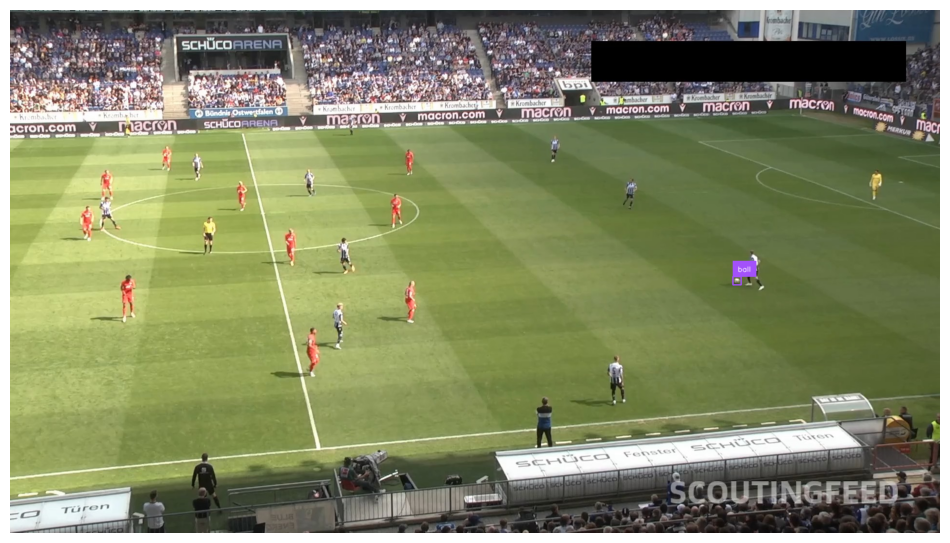

In [19]:
from io import BytesIO

import requests

from PIL import Image
from PIL.ImageFile import ImageFile

import supervision as sv

def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()  # check if the request was successful
    image = Image.open(BytesIO(response.content))
    return image



detections = sv.Detections.from_inference(results)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

image = load_image_from_url(image_url)

annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)